### Correlazione tra l'aumento della concentrazione di $\mathrm{CO_2}$ e l'aumento della temperatura media 

Stima basata sui dati storici di concentrazione di $\mathrm{CO_2}$ e *anomalia* termica ($\Delta T$), dal 1850 fino ad oggi, ricavati dal database di [C-Roads](https://c-roads.climateinteractive.org/scenario.html?v=23.12.0) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

Leggiamo i dati rilevanti salvati in due file nel folder contenente questo notebook. Per questa operazione usiamo la funzione *loadtxt* della libreria *numpy* che legge ogni file e ne salva il contenuto in due array numpy (in questo caso si tratta di array bidimensionali):

In [2]:
co2_data=np.loadtxt("co2_history.dat")
temp_data=np.loadtxt("temp_history.dat")

Ogni file è costituito da due colonne: la prima colonna contiene gli anni; la seconda colonna contiene la grandezza corrispondente (concentrazione dell'anidride carbonica, oppure l'anomalia termica). Estraiamo in variabili separate (ovvero, *numpy array* separati) gli anni, la concentrazione della $\mathrm{CO_2}$ e l'anomalia termica. Per questa operazione usiamo una tecnica di *splicing*: per esempio,

```
year_list=co2_data[:,0]
```

seleziona tutti (:) i dati della prima colonna (0) dell'array *co2_data* e li assegna alla variabile *year_list*.

In [3]:
year_list=co2_data[:,0]
co2_list=co2_data[:,1]
temp_list=temp_data[:,1]

Plottiamo i dati (*grezzi*) relativi alla concentrazione di $\mathrm{CO_2}$ nella serie temporale:

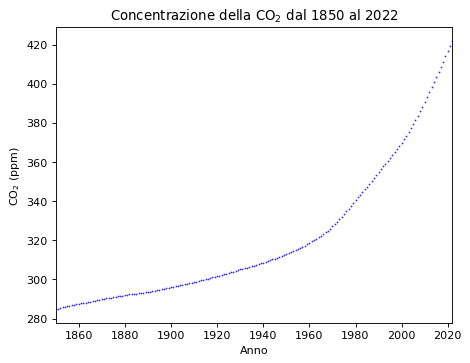

In [4]:
plt.figure(dpi=80)
plt.plot(year_list, co2_list, "b.", markersize=1)
plt.xlim(1850, 2022)
plt.xlabel("Anno")
plt.ylabel('$\mathrm{CO_2}$ (ppm)')
plt.title("Concentrazione della $\mathrm{CO_2}$ dal 1850 al 2022")
plt.show()

Facciamo un plot analogo per la variazione della temperatura (registrata negli stessi anni rispetto al 1850):

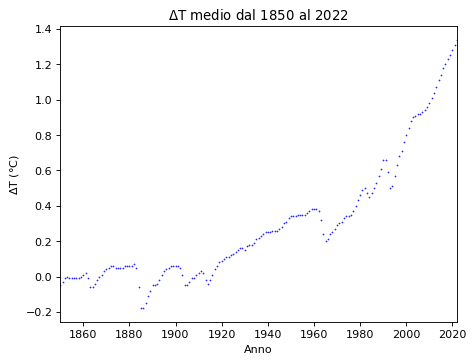

In [5]:
plt.figure(dpi=80)
plt.plot(year_list, temp_list, "b.", markersize=1)
plt.xlim(1850, 2022)
plt.xlabel("Anno")
plt.ylabel('$\Delta$T (°C)')
plt.title("$\Delta$T medio dal 1850 al 2022")
plt.show()

In particolare, vediamo che l'andamento dell'anomalia termica nel tempo segue un trend (di aumento) ben visibile; tuttavia $\Delta T$ è soggetta a fluttuazioni che potremmo cercare di ridurre (in media) usando un qualche tipo di fit. Il metodo da usarsi più adatto in casi come questo (dove non si ha un'idea chiara di quale funzione potrebbe *fittare* al meglio l'andamento dei dati $\Delta T(anno)$) è lo *spline-fit*, dove 

- il dominio della variabile indipendente (l'anno) è suddiviso in segmenti comprendenti un certo numero di dati consecutivi;
- entro ogni segmento si procede con una regressione di tipo polinomiale di grado (*k*) assegnato, ma
- assicurando che tra ogni segmento e quello adiacente ci sia continuità nelle derivate prime e seconde delle funzioni polinomiali interpolanti.

Il numero di punti su cui ogni segmento si estende è determinato indirettamente da un parametro (*s*) che corrisponde al grado di *smoothness* della *spline* risultante: più *s* è piccolo, più *forziamo* la spline a passare il più vicino possibile ai punti che stiamo interpolando (e questo equivale a ridurre il numero di punti adiacenti per ogni segmento). 

In questo caso scegliamo *k=2* (polinomio di secondo grado) sia per lo spline fit dei dati sulla $\mathrm{CO_2}$, sia per il fit dei dati su $\Delta T$; per quanto riguarda lo smoothing scegliamo *s*=20 per i dati sulla $\mathrm{CO_2}$, mentre poniamo *s*=0.8 per i dati sulla temperatura.

La funzione che usiamo per l'operazione si chiama *UnivariateSpline* e proviene dalla libreria *scipy.interpolate*.

I parametri degli *spline-fit* prodotti, vengono salvati nelle variabili *spl_CO2* e *spl_temp*.

In [6]:
spl_CO2=UnivariateSpline(year_list, co2_list, k=2, s=20)
spl_temp=UnivariateSpline(year_list, temp_list, k=2, s=0.8)

A questo punto, possiamo ricalcolare i valori di $\mathrm{CO_2}$ e di $\Delta T$ a partire dagli *spline-fit* e plottarli insieme ai dati grezzi (non interpolati) per avere un'idea della qualità del fit. I dati *fittati* si possono ottenere *applicando* le due *variabili* *spl_CO2* e *spl_temp* alla lista *year_list* (le due variabili in oggetto non sono in realtà *semplici variabili*, ma sono vere e proprie funzioni che contengono i parametri degli *spline-fit* e li usano per ricalcolare la variabile dipendente a partire dal valore di quella indipendente):  

In [7]:
CO2_spline=spl_CO2(year_list)
temp_spline=spl_temp(year_list)

Plottiamo adesso i dati originali per $\mathrm{CO_2}$ insieme a quelli interpolati (per rendere più chiaro il grafico, i dati originali vengono *campionati* in modo che solo uno ogni 10 venga plottato):

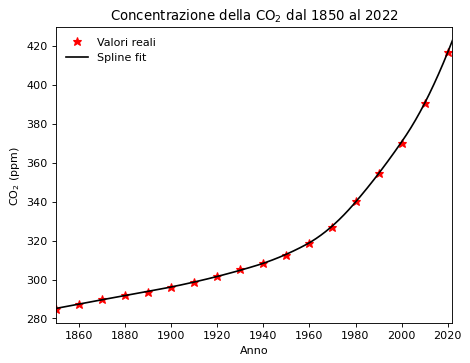

In [8]:
year_length=len(year_list)
select=np.arange(0, year_length, 10)

year_plot=year_list[select]
co2_plot=co2_list[select]
temp_plot=temp_list[select]

plt.figure(dpi=80)
plt.plot(year_plot, co2_plot, "r*", markersize=8, label="Valori reali")
plt.plot(year_list, CO2_spline, "k-", label="Spline fit")
plt.xlim(1850, 2022)
plt.xlabel("Anno")
plt.ylabel('$\mathrm{CO_2}$ (ppm)')
plt.title("Concentrazione della $\mathrm{CO_2}$ dal 1850 al 2022")
plt.legend(frameon=False)
plt.show()

Facciamo la stessa operazione sui dati di temperatura:

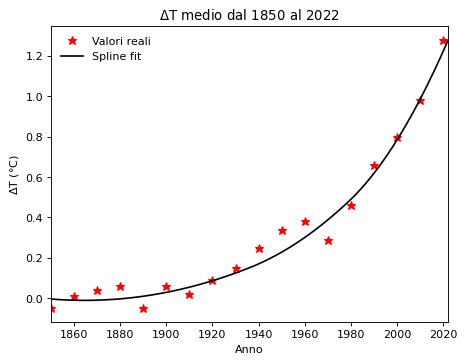

In [9]:
plt.figure(dpi=80)
plt.plot(year_plot, temp_plot, "r*", markersize=8, label="Valori reali")
plt.plot(year_list, temp_spline, "k-", label="Spline fit")
plt.xlim(1850, 2022)
plt.xlabel("Anno")
plt.ylabel('$\Delta$T (°C)')
plt.title("$\Delta$T medio dal 1850 al 2022")
plt.legend(frameon=False)
plt.show()

Plottiamo adesso $\Delta$T in funzione della concentrazione di anidride carbonica: 

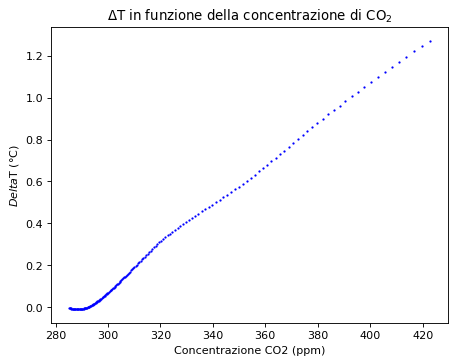

In [10]:
plt.figure(dpi=80)
plt.plot(CO2_spline, temp_spline, "b.", markersize=2)
plt.xlabel("Concentrazione CO2 (ppm)")
plt.ylabel("$Delta$T (°C)")
plt.title("$\Delta$T in funzione della concentrazione di $\mathrm{CO_2}$")
plt.show()

Vediamo che esiste una dipendenza essenzialmente lineare tra le due variabili. Facciamo allora un fit lineare (polinomiale di ordine 1) usando $\mathrm{CO_2}$ come variabile indipendente e $\Delta$T come variabile dipendente. 

I valori delle variabili sono quelli che vengono dagli *spline-fit*.

Per questa operazione usiamo la funzione *polyfit* della libreria *numpy*. La funzione accetta come argomenti la lista (o l'array) dei valori della variabile indipendente; la lista dei valori della variabile dipendente e il grado del polinomio; il risultato del fit (le variabili *m* e *q*)

$$\Delta T = m\mathrm{[CO_2]} + q$$ 

è qui salvato nella *variabile* *linear_fit*

In [11]:
linear_fit=np.polyfit(CO2_spline, temp_spline, 1)

Effettuato il fit, usiamo la funzione *polyval* per ricalcolare i valori di $\Delta T$ in funzione della concentrazione di anidride carbonica (sulla base del fit lineare) e poi li confrontiamo con i dati non fittati:   

In [12]:
temp_fit=np.polyval(linear_fit, CO2_spline)
temp_spline_plot=temp_spline[select]
CO2_spline_plot=CO2_spline[select]

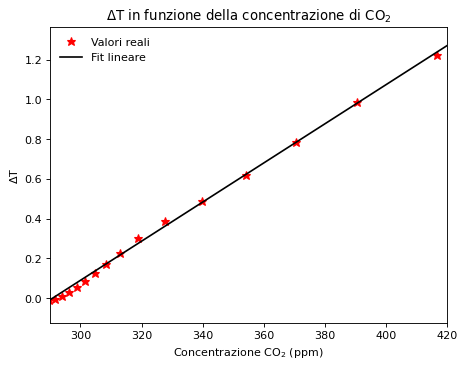

In [13]:
plt.figure(dpi=80)
plt.plot(CO2_spline_plot, temp_spline_plot, "r*", markersize=8, label="Valori reali")
plt.plot(CO2_spline, temp_fit, "k-", label="Fit lineare")
plt.xlabel("Concentrazione $\mathrm{CO_2}$ (ppm)")
plt.ylabel("$\Delta$T")
plt.xlim(290, 420)
plt.title("$\Delta$T in funzione della concentrazione di $\mathrm{CO_2}$")
plt.legend(frameon=False)
plt.show()

Il grafico dimostra che il fit lineare riproduce abbastanza bene l'andamento di $\Delta T$ in funzione della concentrazione di $\mathrm{CO_2}$.

Volendo ridurre la regione del fit a partire da una concentrazione dell'anidride carbonica di 320 ppm (per valori inferiori si vede uno scostamento più o meno marcato dal modello lineare; questo equivale a selezionare i dati escludendo quelli anteriori al 1944), possiamo prodecedere come segue:

In [14]:
ipos310=np.where(CO2_spline > 310)
CO2_310=CO2_spline[ipos310]
temp_310=temp_spline[ipos310]
linear_fit_310=np.polyfit(CO2_310, temp_310, 1)

Nel software *En-Roads*, la correlazione tra $\Delta T$ e concentrazione di $\mathrm{CO_2}$ viene denominata ***climate sensitivity***. Questa è data in termini di aumento di temperatura causato da un raddoppio della concentrazione del gas serra in atmosfera. Il valore di default usato in *En-Roads* per questo parametro è 3: la temperatura aumenta di 3°C per una raddoppio di [$\mathrm{CO_2}$]. vediamo quanto otteniamo *noi* dal nostro fit. Usiamo come dato di input la concentrazione di $\mathrm{CO_2}$ prevista per il 2100 (estrapolata dai trend di emissione attuali; dato *En-Roads*) che è pari a 628 ppm; la metà di quel valore è 314 ppm:   

In [15]:
sensitivity = np.polyval(linear_fit_310, 628)-np.polyval(linear_fit_310, 314)
print("Sensitivity: %4.2f " % sensitivity)

Sensitivity: 3.00 


Valore in *eccellente* accordo con quello di *En-Road* (ovviamente gli estensori di *En-Roads* devono aver usato lo stesso procedimento visto in questo notebook per ricavare la *sensitivity*). 

Se si usano tutti i dati storici a partire dal 1850, la *sensitivity*  vale 

In [17]:
sensitivity_all=np.polyval(linear_fit, 628)-np.polyval(linear_fit, 314)
print("Sensitivity (all data): %4.2f " % sensitivity_all)

Sensitivity (all data): 3.09 
